In [1]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

## Entropy

The **number of distinct node degrees - 1** divided by the **number of nodes** in the graph

In [2]:
def averageDegree(g):
    return sum(g.degree(node) for node in g.nodes()) / nx.number_of_nodes(g)

In [3]:
def entropy(g):
    avg_deg = averageDegree(g)
    return math.sqrt(sum((g.degree(node) - avg_deg) ** 2 for node in g.nodes())) / nx.number_of_nodes(g)

In [4]:
def runExperiment(n):

    p_step = 0.05
    xs = np.arange(0, 1 + p_step, p_step)
    ys = [[], []]

    for p in xs:
        print('Progress: {}%'.format(int(p * 100)), end='')
        ys[0].append(entropy(nx.fast_gnp_random_graph(n, p)))
        ys[1].append(entropy(nx.watts_strogatz_graph(n, round(n / 2), p)))
        print(end='\r')

    plt.plot(xs, ys[0], label="Erdös-Rényi")
    plt.plot(xs, ys[1], label="Watts Strogatz")

    plt.title('Entropy for {} nodes'.format(n), y=1.15) 

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)

    plt.xlabel('p')
    plt.ylabel('Entropy')

    plt.savefig('experiment_n{}.png'.format(n))
    plt.show()

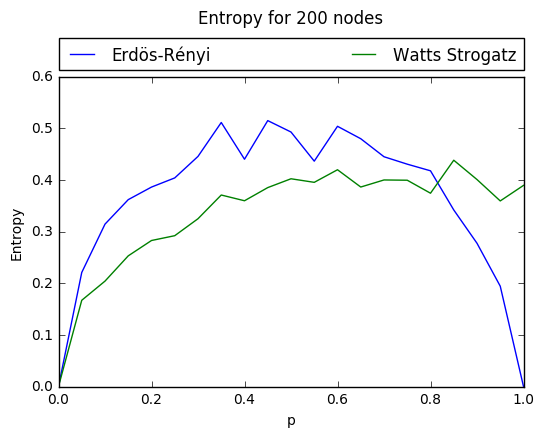

In [5]:
runExperiment(200)

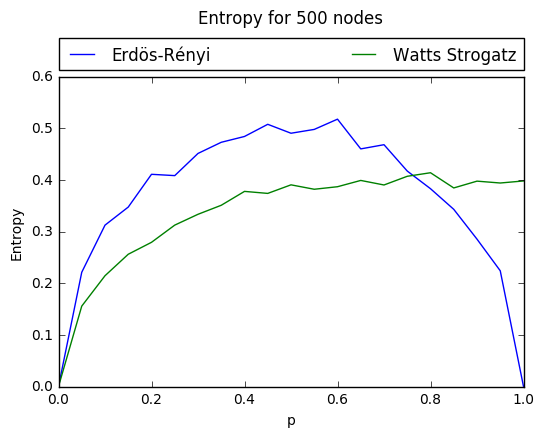

In [6]:
runExperiment(500)

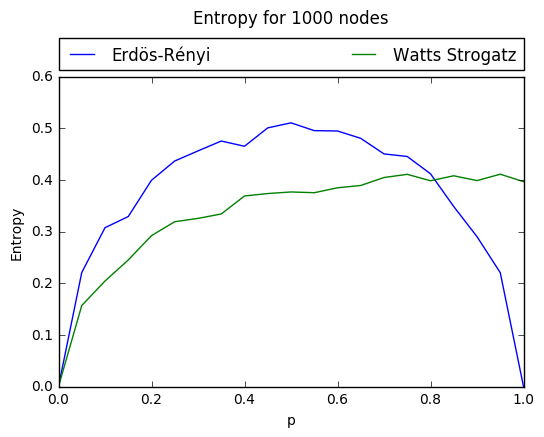

In [7]:
runExperiment(1000)